In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'../data/diabetes.csv', sep=',', encoding='utf-8')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cleaning data

In [14]:
# Remove missing values
df.dropna(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
# Remove rows with 0 values in the Glucose column
df = df[df['Glucose'] != 0]

# Remove rows with 0 values in the Insulin column
df = df[df['Insulin'] != 0]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


### Handling outliers

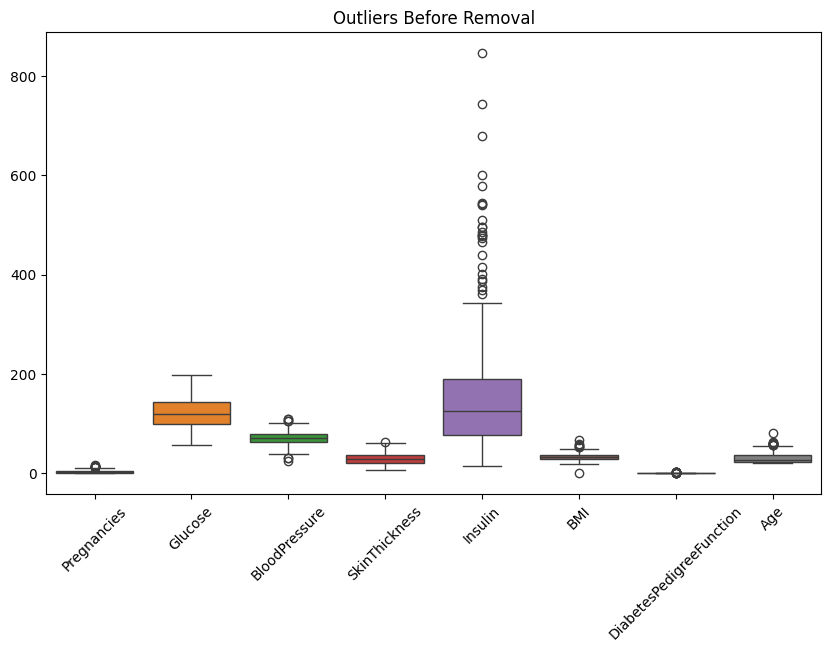

In [16]:
# Step 1
# Define the columns containing numeric data
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a boxplot to visualize outliers before removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Outliers Before Removal")
plt.xticks(rotation=45)
plt.show()

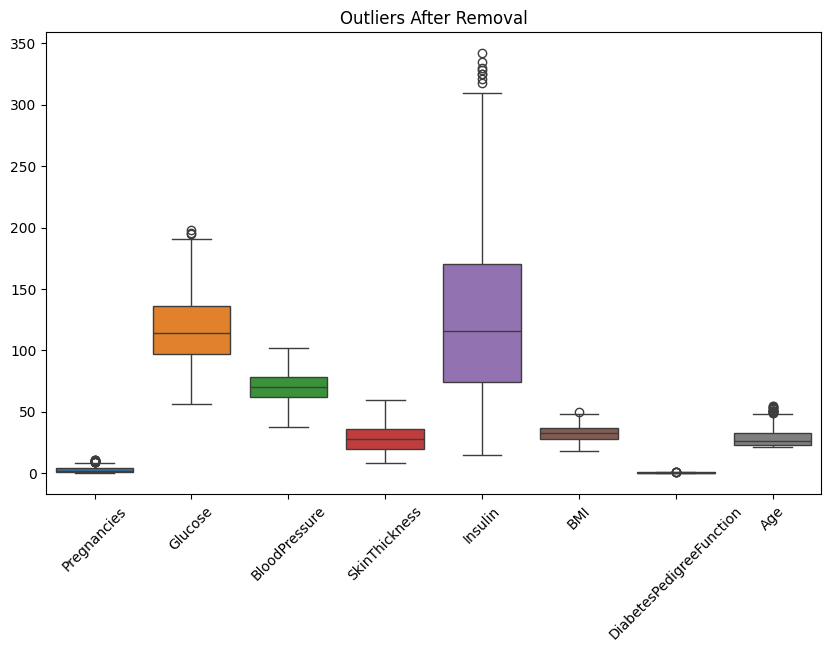

In [17]:
# Calculate the IQR and remove outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
filtered_df = df[~outlier_mask]

# Create a boxplot to visualize outliers after removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df[numeric_columns])
plt.title("Outliers After Removal")
plt.xticks(rotation=45)
plt.show()

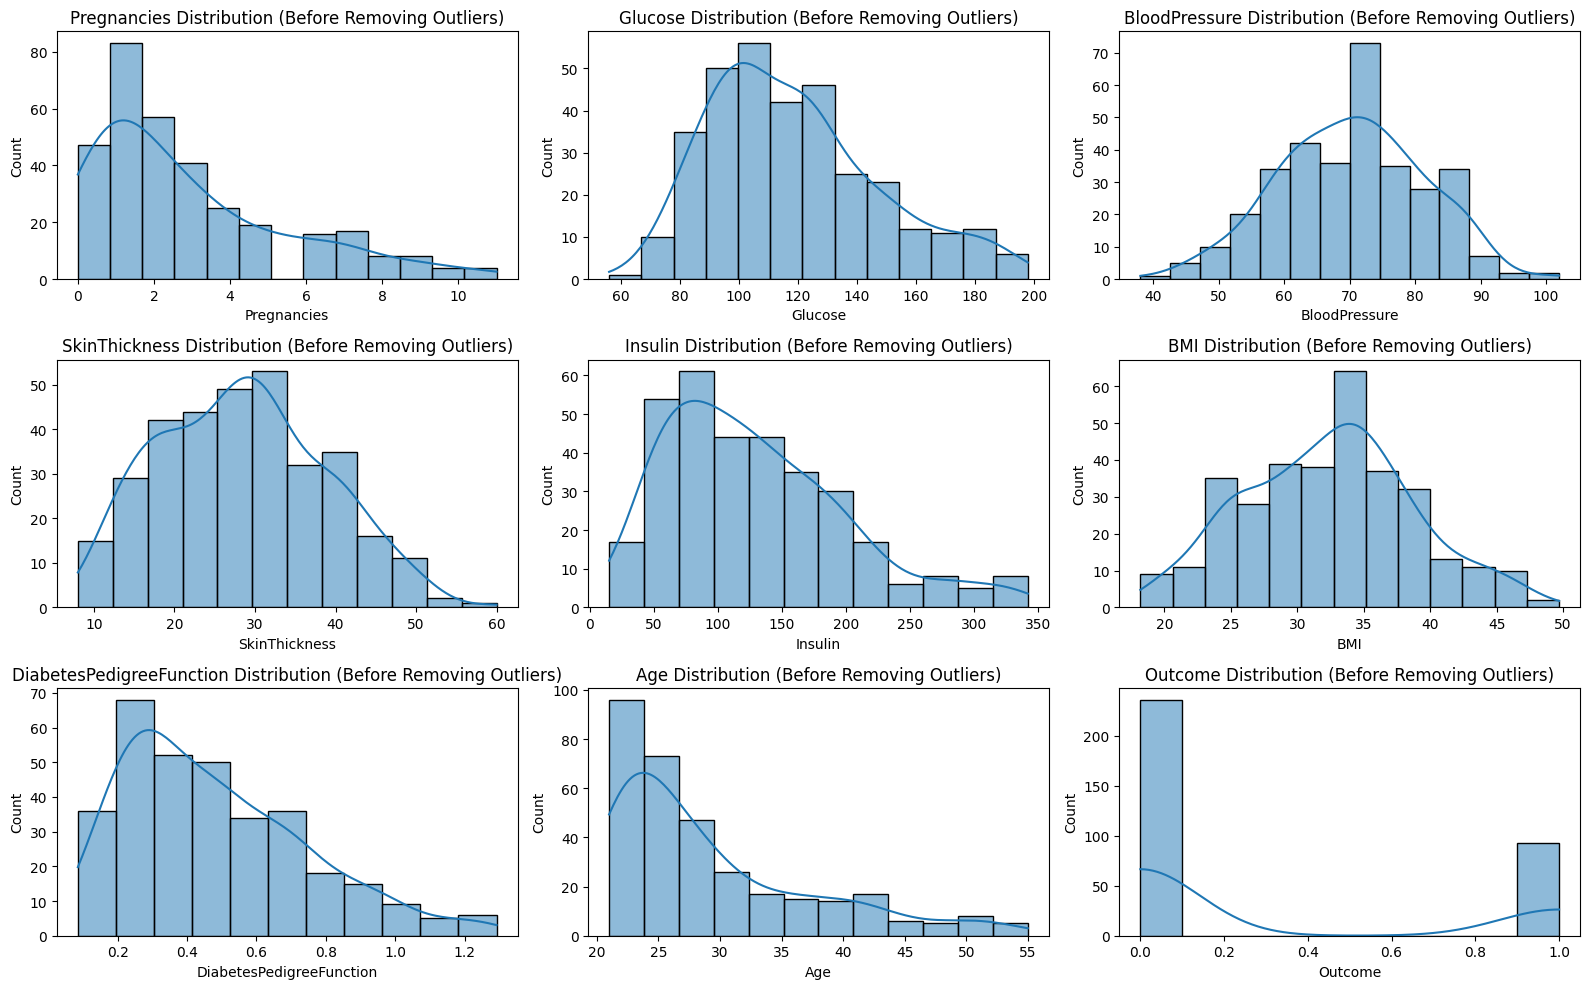

In [18]:
# Step 2
plt.figure(figsize=(16, 10))
for i, column in enumerate(filtered_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=filtered_df, x=column, kde=True)
    plt.title(f'{column} Distribution (Before Removing Outliers)')

plt.tight_layout()

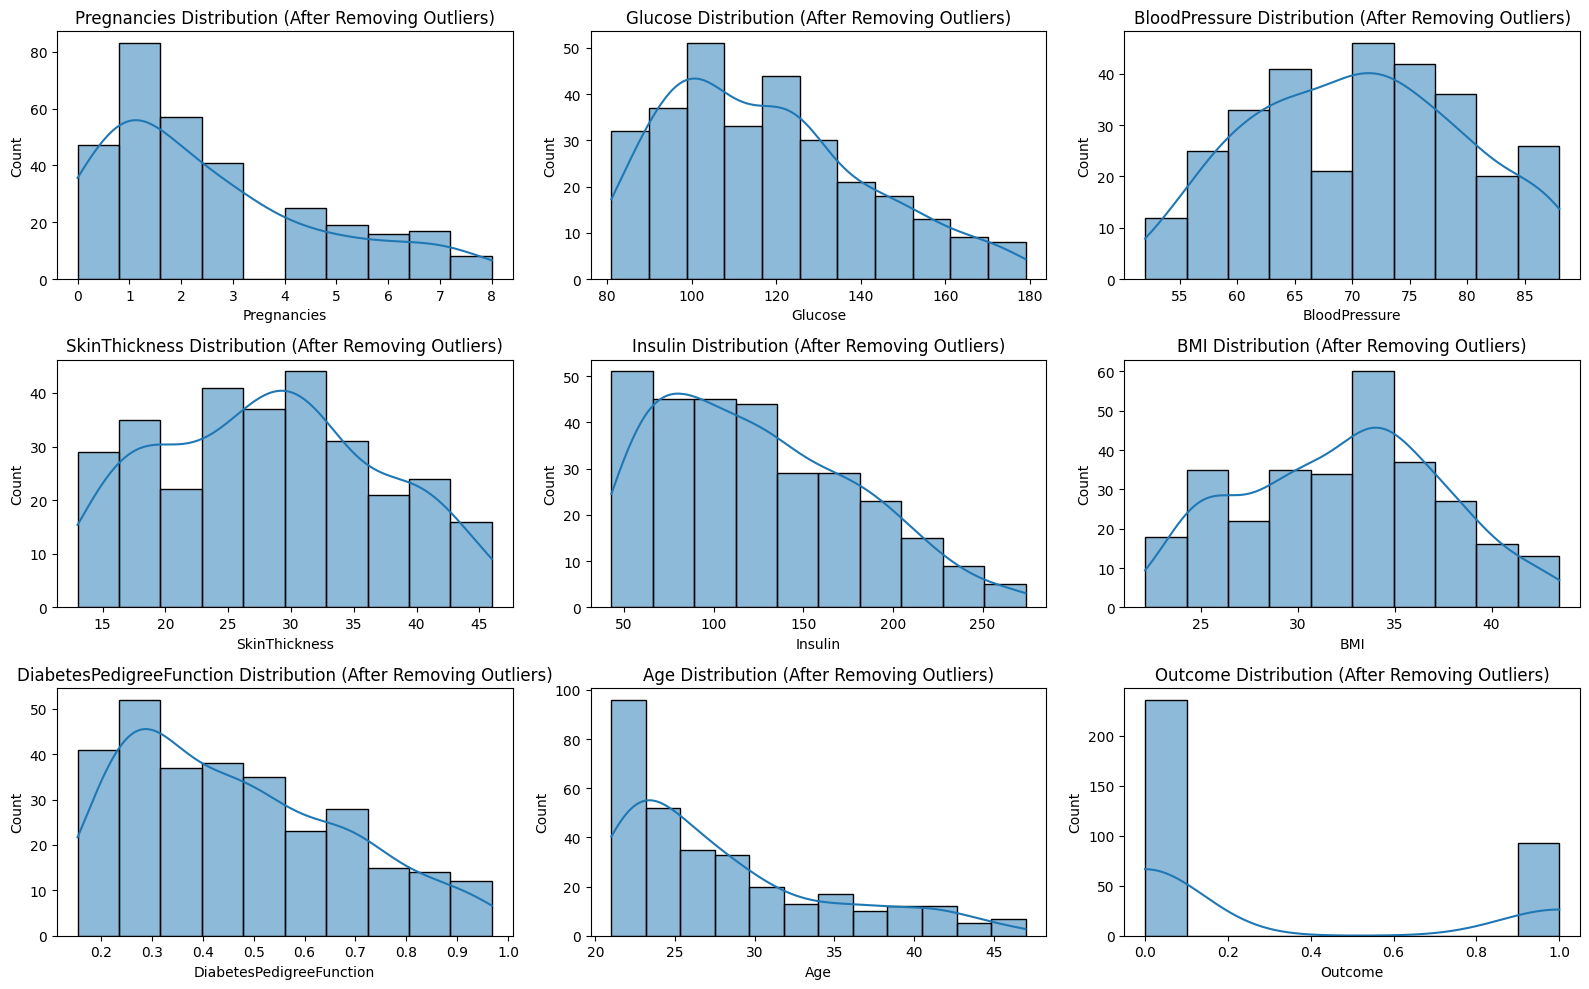

In [19]:
# Remove Outliers
# Define a threshold for outliers
lower_threshold = filtered_df.quantile(0.05)
upper_threshold = filtered_df.quantile(0.95)

# Remove outliers based on the threshold
filtered_df = filtered_df[(filtered_df >= lower_threshold) & (filtered_df <= upper_threshold)]

# Step 3: Create Before and After Graphs
plt.figure(figsize=(16, 10))
for i, column in enumerate(filtered_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=filtered_df, x=column, kde=True)
    plt.title(f'{column} Distribution (After Removing Outliers)')

plt.tight_layout()

plt.show()

In [20]:
filtered_df.count()

Pregnancies                 313
Glucose                     296
BloodPressure               302
SkinThickness               300
Insulin                     295
BMI                         297
DiabetesPedigreeFunction    295
Age                         312
Outcome                     329
dtype: int64

After removing outliers from the dataset, I noticed that some columns had missing values, which could affect the analysis. To ensure that all columns had the same number of rows and to address these missing values, I applied a Python function called 'fillna.' This function filled the missing values in each column with the mean value of that column, ensuring consistency and completeness in the dataset

In [21]:
filtered_df = filtered_df.fillna(filtered_df.mean())
filtered_df.count()

Pregnancies                 329
Glucose                     329
BloodPressure               329
SkinThickness               329
Insulin                     329
BMI                         329
DiabetesPedigreeFunction    329
Age                         329
Outcome                     329
dtype: int64

In [22]:
count_0s = (filtered_df['Outcome'] == 0).sum()
count_1s = (filtered_df['Outcome'] == 1).sum()

print(f'Number of 0s: {count_0s}')
print(f'Number of 1s: {count_1s}')

Number of 0s: 236
Number of 1s: 93


In [23]:
%store filtered_df

Stored 'filtered_df' (DataFrame)
